In [1]:
import numpy as np
import pandas as pd
import os
from PIL import Image
import cv2
import random

In [2]:
img_df = pd.read_csv("./train.csv")
img_df.head()

,ID,img_path,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,TRAIN_00000,./train/TRAIN_00000.jpg,8,1,16,12,5,10,14,2,13,4,7,3,6,9,11,15
1,TRAIN_00001,./train/TRAIN_00001.jpg,3,7,2,13,1,5,10,4,11,14,9,15,16,12,8,6
2,TRAIN_00002,./train/TRAIN_00002.jpg,9,12,11,14,6,16,10,13,15,8,3,1,4,5,2,7
3,TRAIN_00003,./train/TRAIN_00003.jpg,14,1,6,15,9,4,8,5,16,10,13,7,2,3,11,12
4,TRAIN_00004,./train/TRAIN_00004.jpg,3,15,12,4,16,13,11,10,9,6,14,5,1,8,2,7


In [3]:
img_path = img_df["img_path"][0]

image = Image.open(img_path)

In [4]:
# 4*4로 자르기 위해 비율을 구하고 저장
img_w = image.width
img_h = image.height

w_rate = img_w/4
h_rate = img_h/4

# 자를 때 시작점을 지정해 줘야 하기에 0부터 시작
w_size_arr = [0]
h_size_arr = [0]

for i in range(1,5):
    w_size = i * w_rate
    h_size = i * h_rate

    w_size_arr.append(w_size)
    h_size_arr.append(h_size)

In [5]:
# 쪼갠 후 배열로 만들어 저장할때
count = 0
images = []
for i in range(len(w_size_arr)-1):
    for j in range(len(h_size_arr)-1):
        # 이미지를 4*4로 자르고 저장
        resize_img = image.crop((w_size_arr[j], h_size_arr[i], w_size_arr[j+1], h_size_arr[i+1]))
        # 이제 이미지를 배열로 만들고 배열을 저장한다.
        images.append(np.array(resize_img))

In [8]:
merged = Image.new('RGB', (img_w, img_h)) # "RGB" 대신 "L"이 들어가면 흑백이 된다.

edge = []
cnt = 0
for i in range(len(w_size_arr)-1):
    for j in range(len(h_size_arr)-1):
        edge.append(cv2.Canny(images[cnt],50,255))
        im = Image.fromarray(edge[cnt])
        cnt += 1
        merged.paste(im, (int(w_rate) * j, int(h_rate) * i))

# 4. 병합한 이미지 저장하기
# merged.save(f'./img2/{img_df["ID"][n]}.jpg')

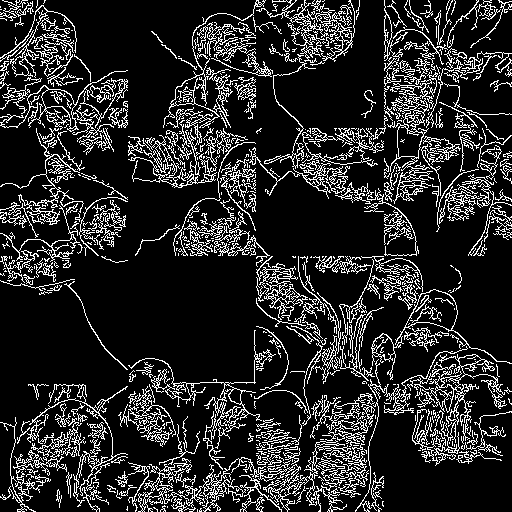

In [9]:
merged